In [1]:
from keras.initializers import RandomUniform
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
## Constants ##
num_classes = 10
img_rows, img_cols = 28, 28

## Data ##
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_train = x_train.astype(np.float32) / 255.0

x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
x_test = x_test.astype(np.float32) / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


## Hyperparameters ##
epochs = 40
batch_size = 512
validation_split = 0.2
kernel_initializer = RandomUniform(minval=0.0000001, 
                                   maxval=0.0001, 
                                   seed=None) 

print('Matrix shapes:')
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

Matrix shapes:
x_train: (60000, 784)
y_train: (60000, 10)


In [3]:
model = Sequential()
model.add(Dense(320, activation='relu', 
                kernel_initializer=kernel_initializer,
                input_shape=[x_train.shape[1]]))
model.add(Dropout(0.66))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

t0 = time.time()
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_split=validation_split)
t1 = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 1s 19us/step - loss: 0.6252 - acc: 0.8269 - val_loss: 0.2867 - val_acc: 0.9204
Epoch 2/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.3309 - acc: 0.9043 - val_loss: 0.2243 - val_acc: 0.9387
Epoch 3/40
48000/48000 [==============================] - 0s 4us/step - loss: 0.2695 - acc: 0.9238 - val_loss: 0.1881 - val_acc: 0.9478
Epoch 4/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.2304 - acc: 0.9340 - val_loss: 0.1635 - val_acc: 0.9546
Epoch 5/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.2047 - acc: 0.9420 - val_loss: 0.1488 - val_acc: 0.9582
Epoch 6/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.1844 - acc: 0.9462 - val_loss: 0.1332 - val_acc: 0.9610
Epoch 7/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.1689 - acc: 0.9521 - val_loss: 0.1249 - val_acc: 0.96

10000/10000 [==============================] - 0s 14us/step


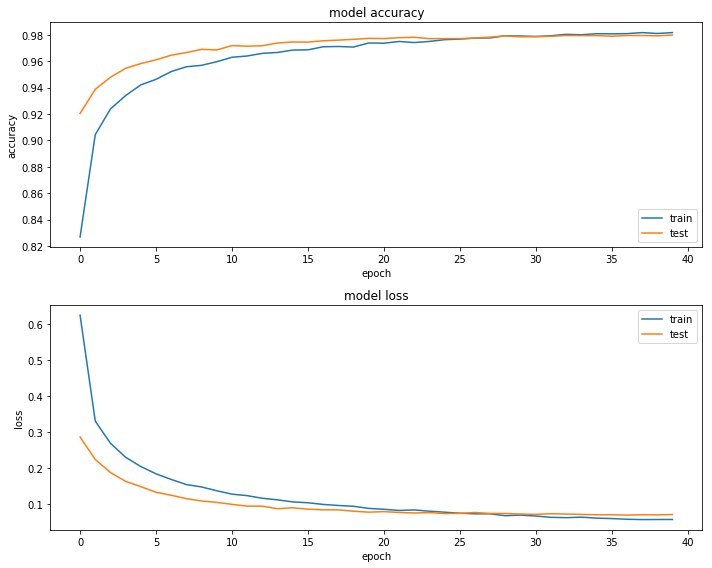

time elapsed:  9.983 seconds
test loss:   0.067
test accuracy:  98.030 %


In [4]:
score = model.evaluate(x_test, y_test, verbose=1)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

print('time elapsed: %6.3f' % float(t1-t0), 'seconds')
print('test loss: %7.3f' % score[0])
print('test accuracy: %7.3f' % (score[1] * 100), '%')